In [42]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

In [43]:
import os
import pandas as pd
import time
from PIL import Image
import numpy as np

labels = [34, 23, 56, 41, 12, 25, 54]

columnNames = list()
columnNames.append('label')
for i in range(2048):
    pixel = str(i)
    columnNames.append(pixel)
    
train_data = pd.DataFrame(columns = columnNames)
num_images = 0

path = './images'
i = 0
for file in os.listdir(path):
    current_path = path + '/' + file
    img = Image.open(current_path).convert(mode="1")
    img.load()
    imgdata = np.asarray(img, dtype="int")

    data = []
    data.append(labels[i])
    for y in range(0,64):
        for x in range(0,32):
            data.append(imgdata[y][x])
    i += 1      
    train_data.loc[len(train_data)] = data
    
train_data = train_data.reset_index(drop = 'true')
train_data.to_csv('out.csv', index = False)
train_data

,label,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,34,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,23,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,56,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,41,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,12,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,25,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,54,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


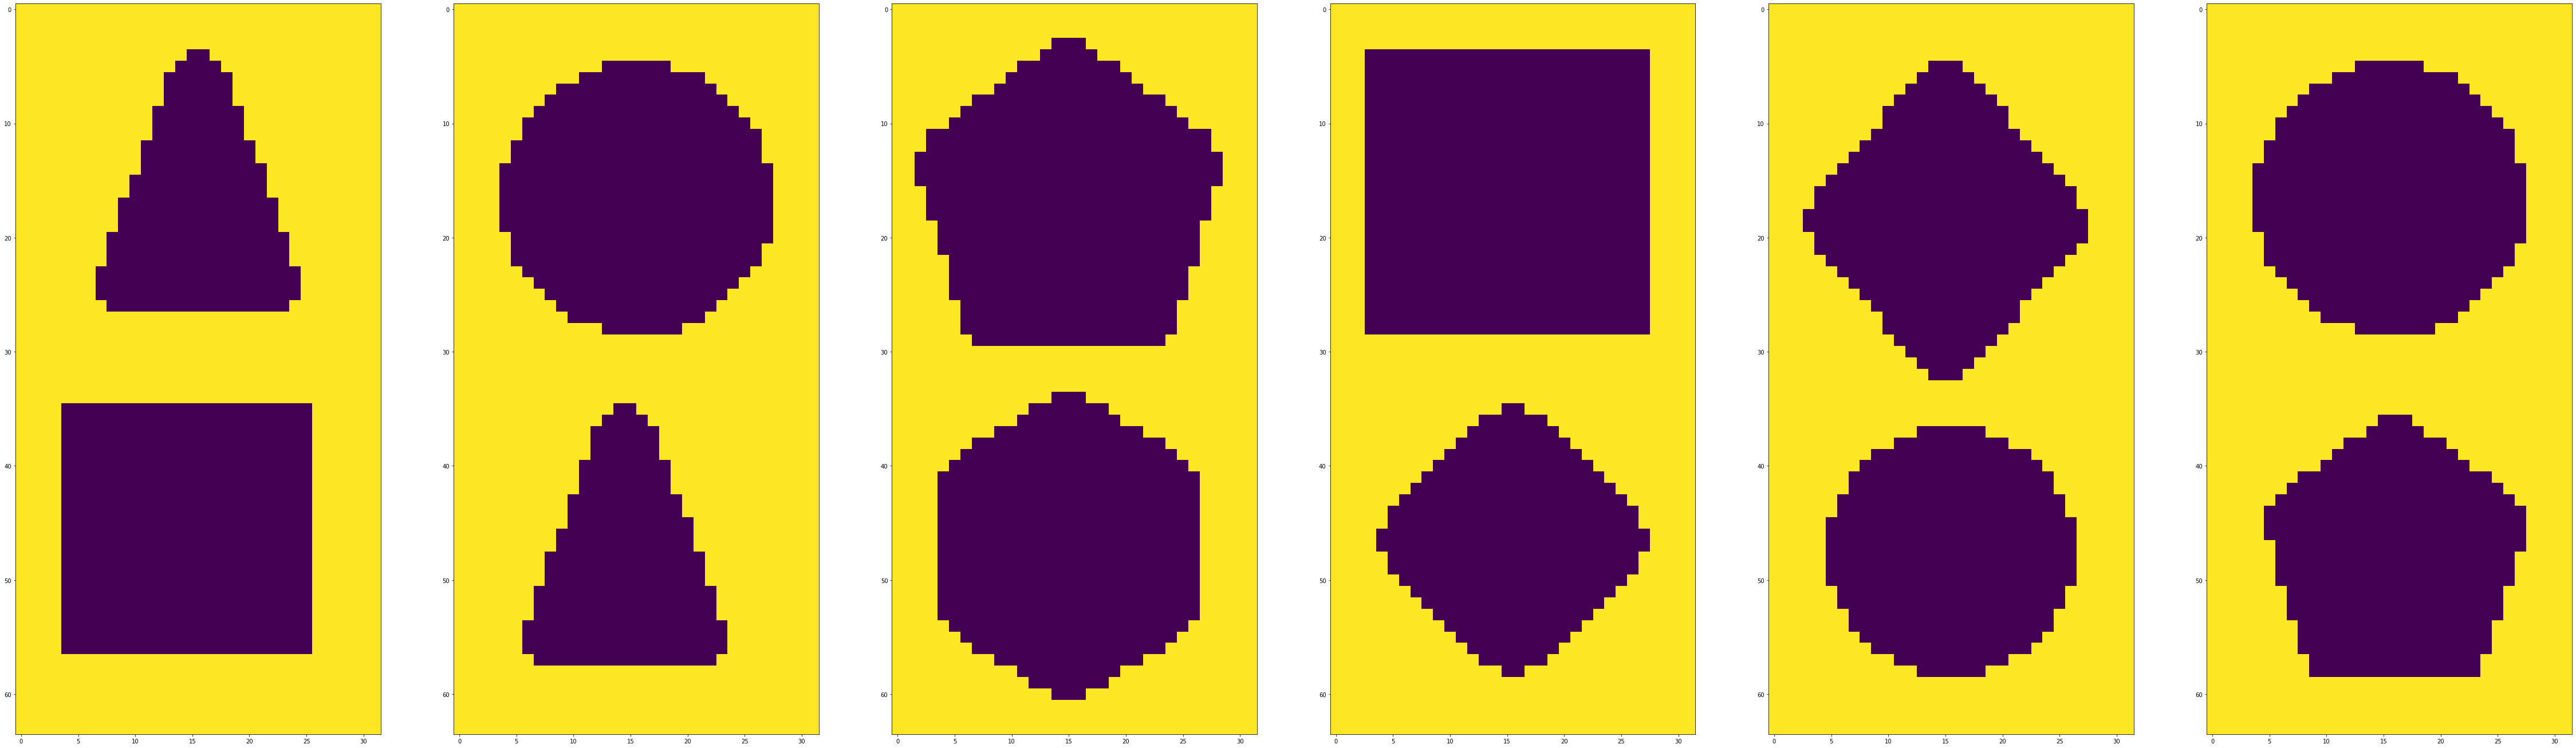

In [44]:
shapes = pd.read_csv('./out.csv')
som_data = pd.concat([shapes.drop(columns=['label'])], ignore_index=True).values
labels = shapes['label'].values
f, ax = plt.subplots(1,6)
f.set_size_inches(80, 40)
for i in range(6):
    ax[i].imshow(som_data[i].reshape(64, 32))
plt.show()

In [62]:
som = MiniSom(16, 16, 2048, sigma=4,
                  learning_rate=0.5, neighborhood_function='gaussian')
som.pca_weights_init(som_data)
som.train(som_data, 1000, random_order=True, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.3696895483501238e-05


C:\Users\coolg\anaconda3\lib\site-packages\minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


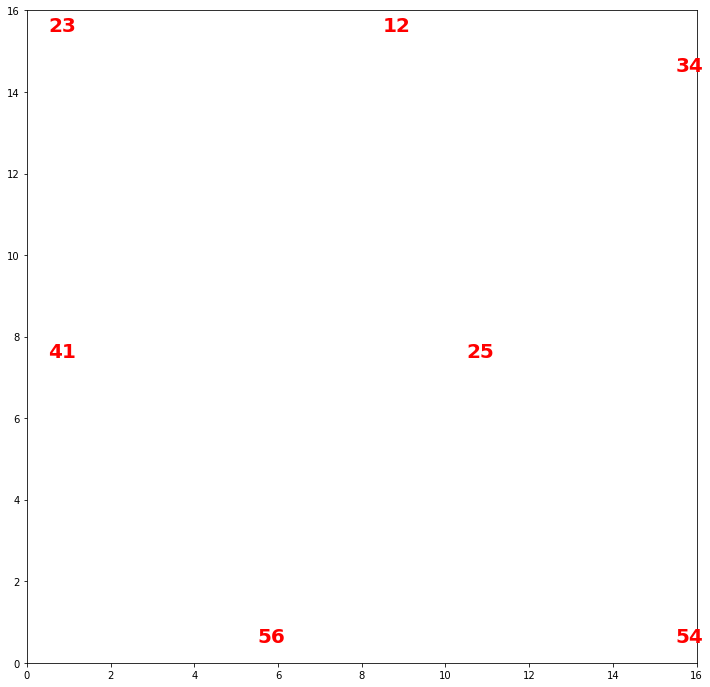

In [66]:
plt.figure(figsize=(12, 12))
wmap = {}
im = 0
for x, t in zip(som_data, labels):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    if(t == 34 or t == 23 or t == 56 or t == 41 or t == 12 or t == 25 or t == 54):
        plt. text(w[0]+.5,  w[1]+.5,  str(t),
                color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 20})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

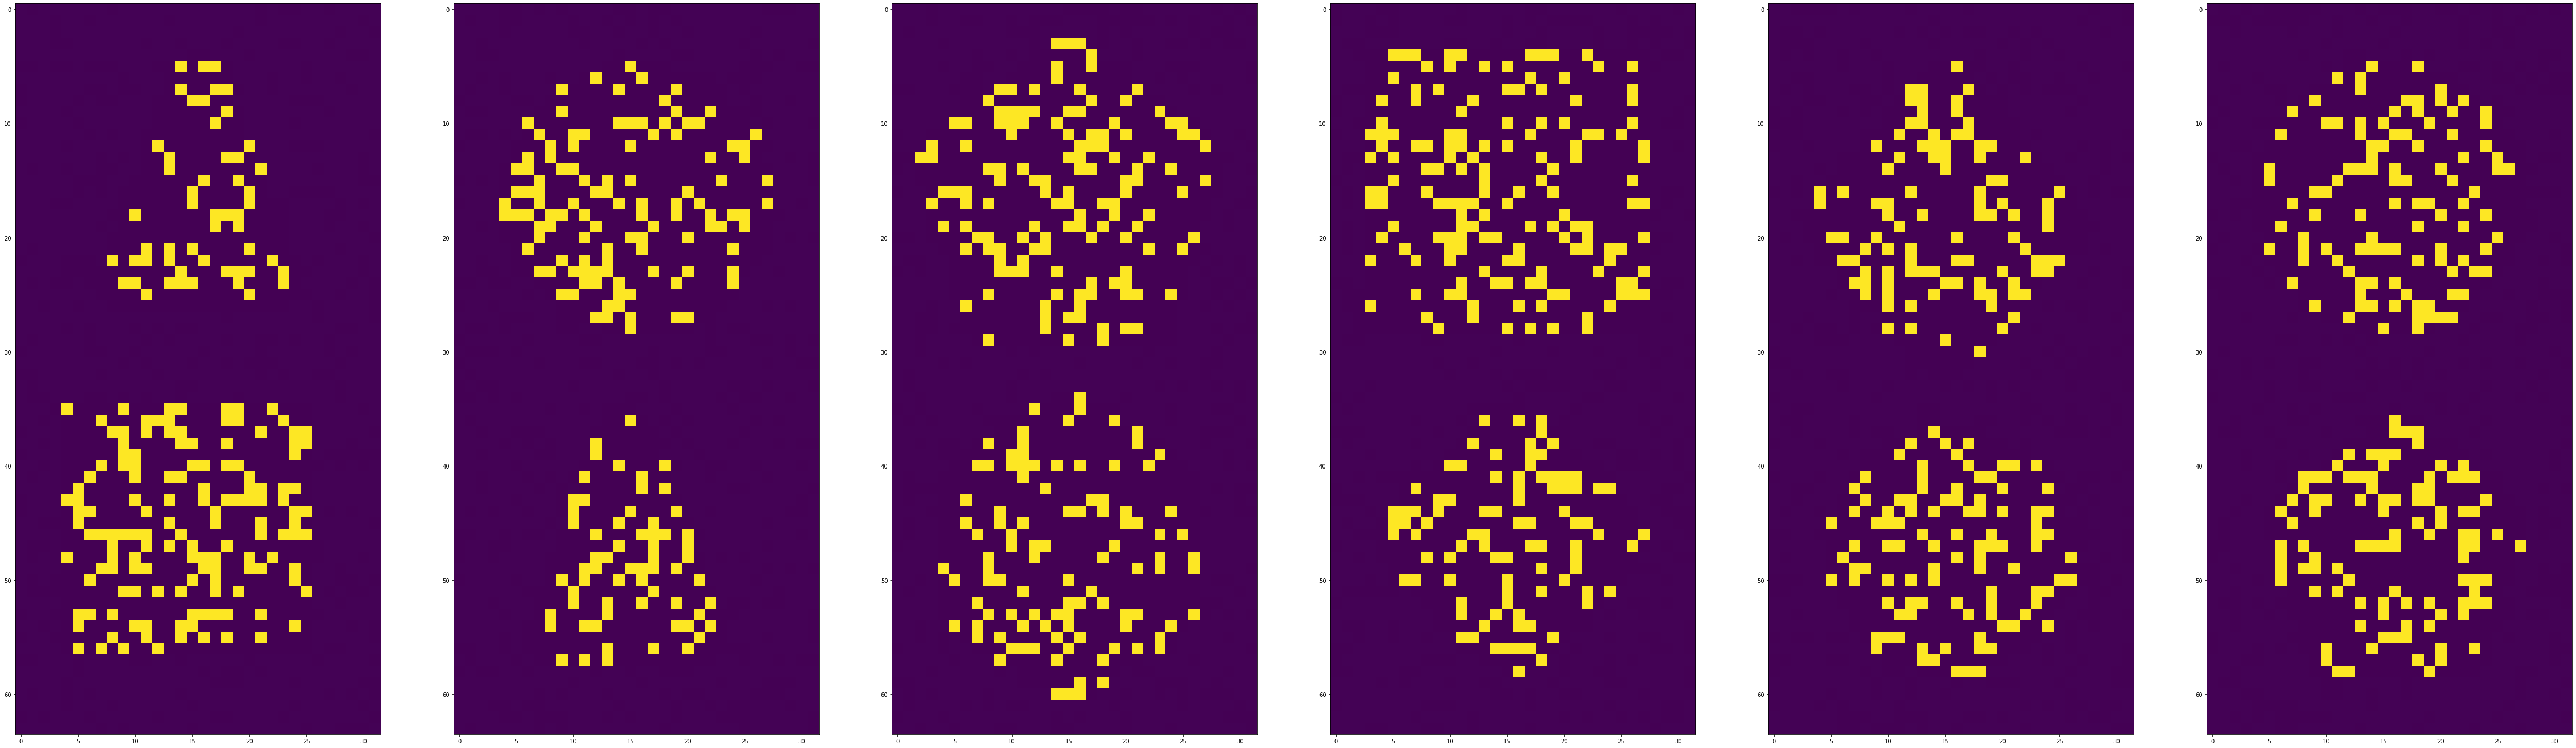

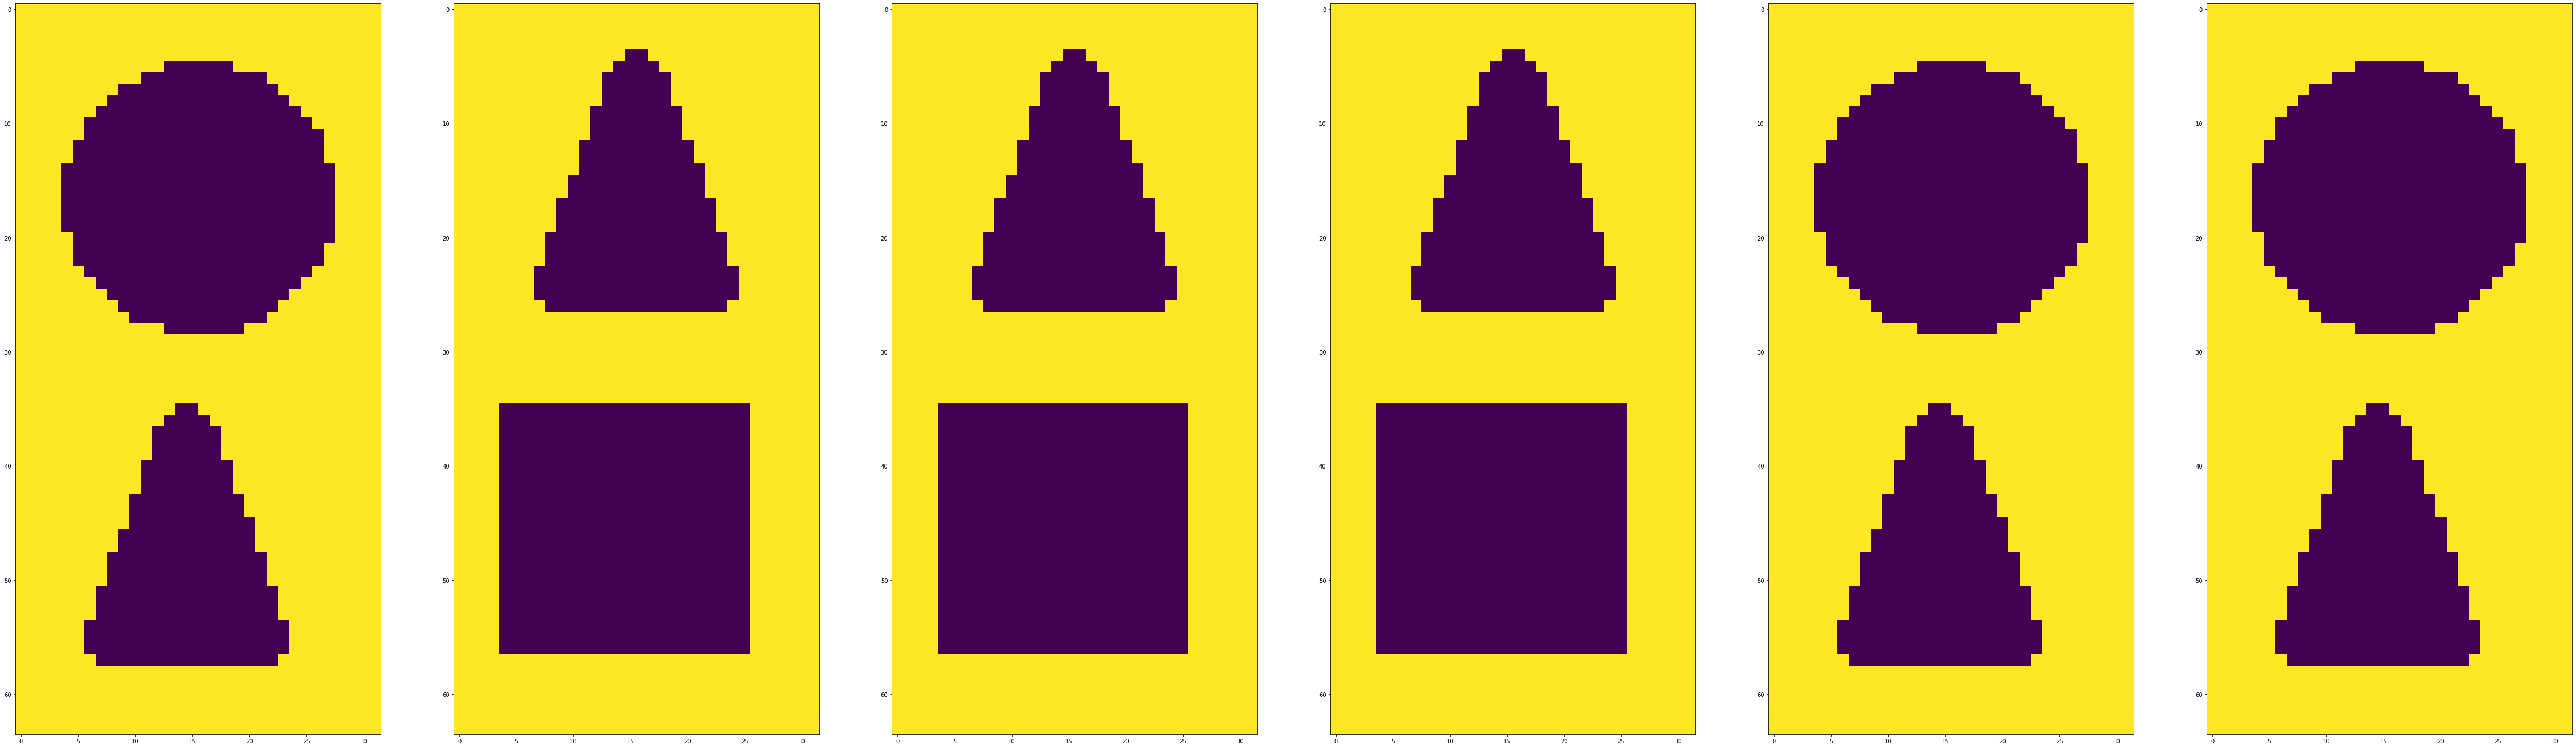

In [67]:
shapes_test = pd.read_csv('out.csv')
test_data = pd.concat([shapes_test.drop(columns=['label'])], ignore_index=True).values
test_labels = shapes_test['label'].values
import random

for test in test_data:
    for i in range(2048):
        if(random.randint(0,100)<25):
            if test[i] > 0:
                test[i] = 0
            else:
                test[i] = 255

f, ax = plt.subplots(1,6)
f.set_size_inches(80, 40)
for i in range(6):
    ax[i].imshow(test_data[i].reshape(64, 32))
    
plt.show()

f, ax = plt.subplots(1,6)
f.set_size_inches(80, 40)
for i in range(6):
    wins =  som.winner(test_data[i])
    if wins in wmap:
        ax[i].imshow(som_data[wmap[wins]].reshape(64,32))
    
plt.show()

In [68]:
def testSom(som_test,input_data,noise=0):
    sum_ = 0
    succes = 0
    testing_data = pd.concat([shapes_test.drop(columns=['label'])], ignore_index=True).values
    testing_labels = shapes_test['label'].values
    for image,label in zip(testing_data,testing_labels):
        for i in range(2048):
            if(random.randint(0,100)<noise):
                if image[i] > 0:
                    image[i] = 0
                else:
                    image[i] = 255
        wins = som_test.winner(image)
        if wins in wmap:
            index = wmap[wins]
            if labels[index] == label:
                succes = succes + 1
        sum_ = sum_ + 1
    return succes / sum_

In [69]:
i = [j*5 for j in range(0,21)]
print(i)


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [70]:
som = MiniSom(32, 32, 2048, sigma=4,
                  learning_rate=0.5, neighborhood_function='mexican_hat',topology='hexagonal')
som.pca_weights_init(som_data)
som.train(som_data, 1000, random_order=True, verbose=True)  # random training
wmap = {}
im = 0
for x, t in zip(som_data, labels):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    im = im + 1


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 8.485737531477971


In [71]:
hex_hist = [testSom(som,shapes_test,j) for j in i]

In [72]:
som = MiniSom(32, 32, 2048, sigma=4,
                  learning_rate=0.5, neighborhood_function='mexican_hat')
som.pca_weights_init(som_data)
som.train(som_data, 1000, random_order=True, verbose=True)  # random training
wmap = {}
im = 0
for x, t in zip(som_data, labels):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    im = im + 1


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 8.276436017379108


In [75]:
rec_hist = [testSom(som,shapes_test,j) for j in i]

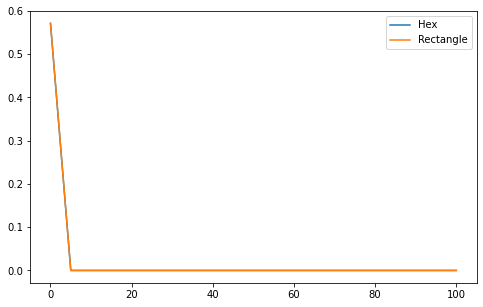

In [76]:

fig, ax = plt.subplots()

ax.plot(i, hex_hist, label = 'Hex')
ax.plot(i, rec_hist, label = 'Rectangle')

ax.legend()

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()
